<a href="https://colab.research.google.com/github/Nardy07/NIDS/blob/main/normalvovs%3Fbetter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [57]:
#importing required libraries
import numpy as np
import pandas as pd
from sklearn.calibration import LabelEncoder
import tensorflow as tf
from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from keras.models import Sequential,save_model
from keras.layers import LSTM, Dense, Dropout,Embedding, SpatialDropout1D,BatchNormalization
from keras.callbacks import EarlyStopping
from keras.utils import to_categorical

In [101]:
X = pd.read_csv('X_balanced_bin2.csv')
y = pd.read_csv('Y_balanced_bin2.csv')

In [102]:
X

,Dst_Port,Tot_Fwd_Pkts,Flow_Byts/s,Fwd_Header_Len,Fwd_Pkts/s,Pkt_Len_Max,Pkt_Len_Mean,Pkt_Size_Avg,Subflow_Fwd_Pkts,Init_Bwd_Win_Byts
0,35934,25,1.360000e+07,500,5284.295075,5200,1310.169811,1335.365385,25,0
1,54941,1,4.382022e+05,8,1605.136437,178,150.333333,225.500000,1,-1
2,10024,0,0.000000e+00,0,0.000000,0,0.000000,0.000000,0,0
3,0,0,0.000000e+00,0,0.000000,0,0.000000,0.000000,0,-1
4,443,17,9.572450e+02,340,0.873680,3900,532.171429,547.823529,17,64240
...,...,...,...,...,...,...,...,...,...,...
153204,0,0,0.000000e+00,0,0.000000,0,0.000000,0.000000,0,-1
153205,0,0,0.000000e+00,0,0.000000,0,0.000000,0.000000,0,-1
153206,53,1,1.814536e+05,8,250.626566,334,151.600000,189.500000,1,-1
153207,0,0,0.000000e+00,0,0.000000,0,0.000000,0.000000,0,-1


In [103]:
y

,Label
0,Normal
1,Normal
2,Abnormal
3,Abnormal
4,Normal
...,...
153204,Abnormal
153205,Abnormal
153206,Normal
153207,Abnormal


In [104]:
# Define the maximum sequence length and vocabulary size
maxlen = 10  # or any appropriate value
max_features = 300  # or any appropriate value

In [105]:
# Define the embedding dimension
embed_dim = 128

In [106]:
normalisation_layer = BatchNormalization()

In [107]:
y = y['Label'].values
le = LabelEncoder()
y = le.fit_transform(y)

In [108]:
scaler = MinMaxScaler()
X = X.values
X = scaler.fit_transform(X)

In [109]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)

In [110]:
X_train = X_train.reshape((X_train.shape[0],1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0],1, X_test.shape[1]))
##scaler = StandardScaler()
#X_train=scaler.fit_transform(X_train)
#X_test  = scaler.transform(X_test)

In [121]:
#model = Sequential()
#model.add(Embedding(max_features, output_dim=embed_dim, input_length=maxlen, trainable=True))
#model.add(SpatialDropout1D(0.2))
#model.add(LSTM(units=128 , return_sequences = True , recurrent_dropout = 0.25 , dropout = 0.25))
#model.add(LSTM(units=64 , recurrent_dropout = 0.2 , dropout = 0.2))
#model.add(Dense(units = 32 , activation = 'relu'))
#model.add(Dense(3, activation='softmax'))
#model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate = 0.001), loss='categorical_crossentropy', metrics=['accuracy'])

#LSTM model defining
model = Sequential()
model.add(LSTM(units=64, input_shape=(1,X_train.shape[2]), return_sequences=True,kernel_regularizer='l2',input_dim =10))
model.add(Dropout(0.2))
model.add(LSTM(units=32,kernel_regularizer='l2'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))


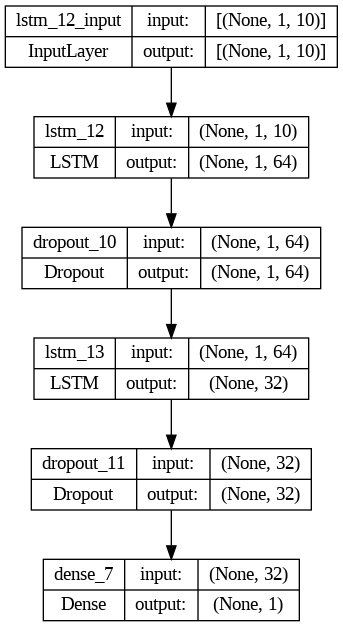

In [122]:
from keras.utils import plot_model
plot_model(model, show_shapes=True, show_layer_names=True)

In [123]:
y

array([1, 1, 0, ..., 1, 0, 0])

In [124]:
#converting labels to one hot encoded format
#num_classes = 2
#y = to_categorical(y)

In [115]:
#def handle_negative_values(data):
 # scaled_data = (data - data.min(axis=0)) / (data.max(axis=0) - data.min(axis=0))
  #transformed_data = 1/(1+np.exp(-scaled_data))

  #return transformed_data
#transformed_data=handle_negative_values(X)
#X = transformed_data

In [125]:
print(y_train.shape)
print(y_test.shape)
print(X_train.shape)
print(X_test.shape)


(122567,)
(30642,)
(122567, 1, 10)
(30642, 1, 10)


In [126]:
batch_size = 32
epochs = 50

In [127]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_12 (LSTM)              (None, 1, 64)             19200     
                                                                 
 dropout_10 (Dropout)        (None, 1, 64)             0         
                                                                 
 lstm_13 (LSTM)              (None, 32)                12416     
                                                                 
 dropout_11 (Dropout)        (None, 32)                0         
                                                                 
 dense_7 (Dense)             (None, 1)                 33        
                                                                 
Total params: 31649 (123.63 KB)
Trainable params: 31649 (123.63 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [130]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate = 0.001), loss='binary_crossentropy', metrics=['accuracy'])

In [128]:
# Define the early stopping monitor and patience
early_stopping_monitor = 'val_loss'
patience = 10

# Create an instance of the EarlyStopping callback
early_stopping = EarlyStopping(monitor=early_stopping_monitor, patience=patience, verbose=1, restore_best_weights=True)

# Add the early stopping callback to the model's callbacks
callbacks = [early_stopping]

In [131]:
history = model.fit(X_train, y_train, batch_size = batch_size , validation_data = (X_test,y_test) , epochs = epochs,callbacks=callbacks)

Epoch 1/50
3831/3831 [==============================] - 15s 3ms/step - loss: 0.7014 - accuracy: 0.5534 - val_loss: 0.6876 - val_accuracy: 0.5534
Epoch 2/50
3831/3831 [==============================] - 11s 3ms/step - loss: 0.6875 - accuracy: 0.5534 - val_loss: 0.6875 - val_accuracy: 0.5534
Epoch 3/50
3831/3831 [==============================] - 11s 3ms/step - loss: 0.6875 - accuracy: 0.5534 - val_loss: 0.6878 - val_accuracy: 0.5534
Epoch 4/50
3831/3831 [==============================] - 11s 3ms/step - loss: 0.6875 - accuracy: 0.5534 - val_loss: 0.6875 - val_accuracy: 0.5534
Epoch 5/50
3831/3831 [==============================] - 13s 3ms/step - loss: 0.6595 - accuracy: 0.5999 - val_loss: 0.5278 - val_accuracy: 0.7716
Epoch 6/50
3831/3831 [==============================] - 12s 3ms/step - loss: 0.5021 - accuracy: 0.7754 - val_loss: 0.4860 - val_accuracy: 0.7717
Epoch 7/50
3831/3831 [==============================] - 11s 3ms/step - loss: 0.4117 - accuracy: 0.8978 - val_loss: 0.3449 - val_ac

In [132]:
print("Accuracy of the model on Training Data is - " , model.evaluate(X_train,y_train)[1]*100 , "%")
print("Accuracy of the model on Testing Data is - " , model.evaluate(X_test,y_test)[1]*100 , "%")

3831/3831 [==============================] - 5s 1ms/step - loss: 0.0907 - accuracy: 0.9892
Accuracy of the model on Training Data is -  98.91651272773743 %
958/958 [==============================] - 1s 1ms/step - loss: 0.0893 - accuracy: 0.9894
Accuracy of the model on Testing Data is -  98.93609881401062 %


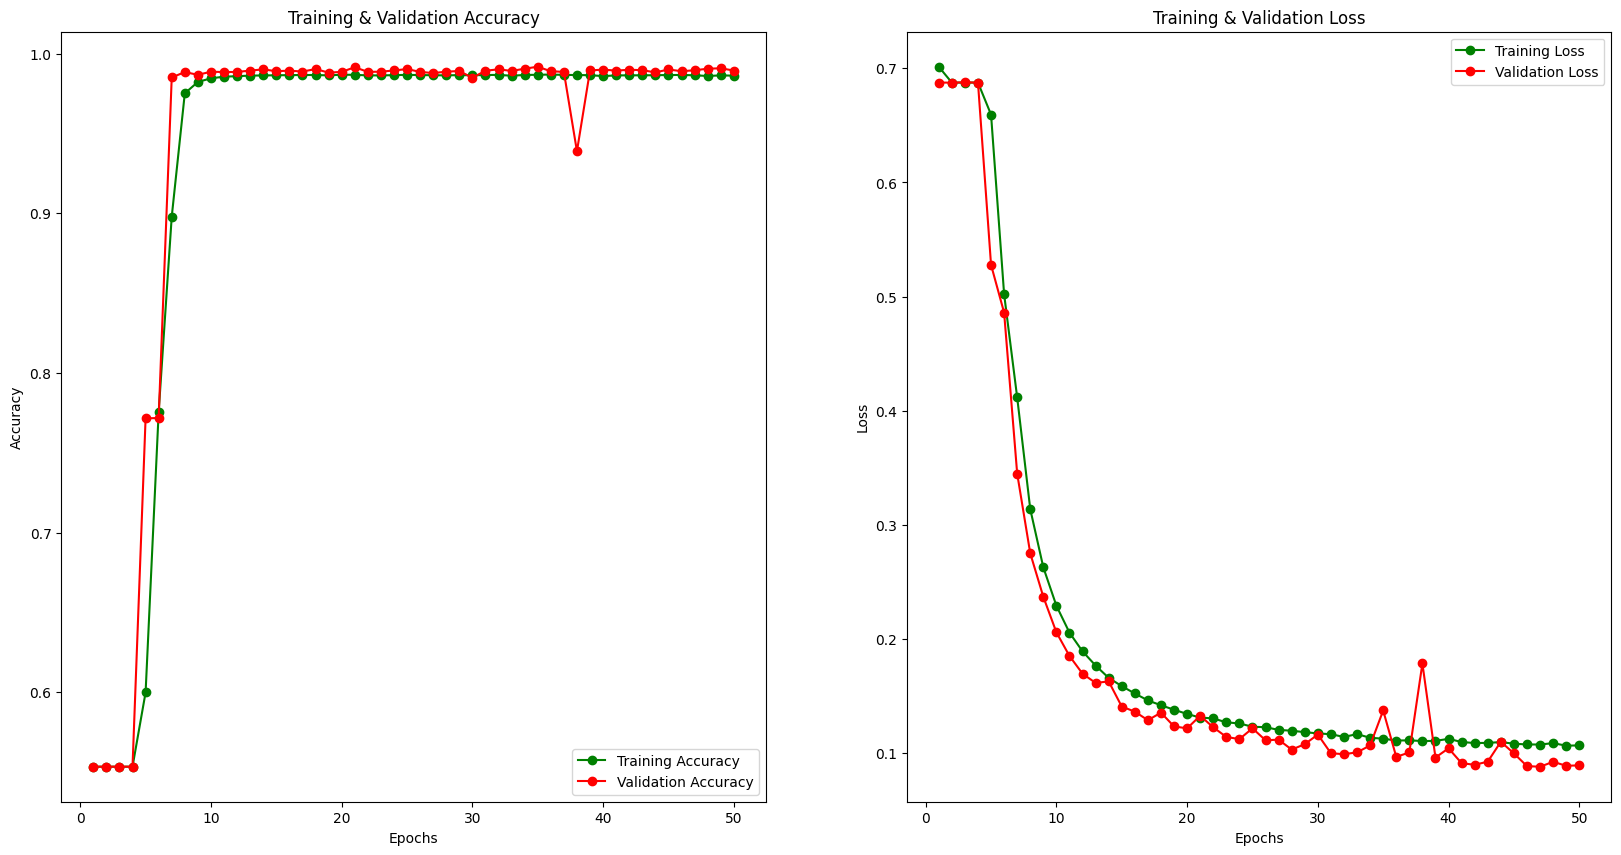

In [133]:
import matplotlib.pyplot as plt
epochs = [i for i in range(1,51)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
fig.set_size_inches(20,10)

ax[0].plot(epochs , train_acc , 'go-' , label = 'Training Accuracy')
ax[0].plot(epochs , val_acc , 'ro-' , label = 'Validation Accuracy')
ax[0].set_title('Training & Validation Accuracy')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")

ax[1].plot(epochs , train_loss , 'go-' , label = 'Training Loss')
ax[1].plot(epochs , val_loss , 'ro-' , label = 'Validation Loss')
ax[1].set_title('Training & Validation Loss')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Loss")
plt.show()

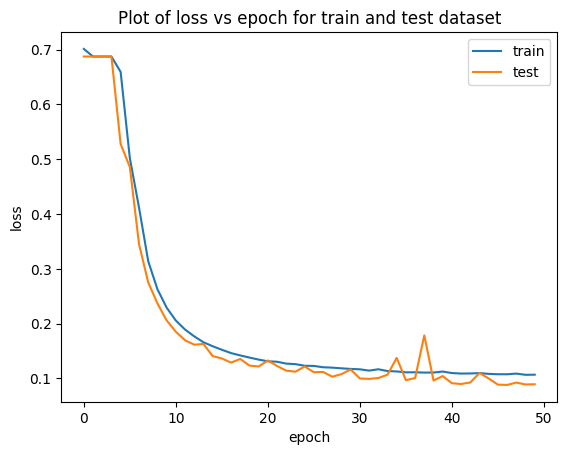

In [134]:
# Plot of loss vs epoch of train and test dataset
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Plot of loss vs epoch for train and test dataset")
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
#plt.savefig('lstm_binary_loss.png')
plt.show()

In [135]:
y_pred = model.predict(X_test)
y_pred = np.round(y_pred)

958/958 [==============================] - 33s 34ms/step


In [136]:
y_pred

array([[1.],
       [1.],
       [0.],
       ...,
       [1.],
       [0.],
       [0.]], dtype=float32)

In [137]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99     16957
           1       1.00      0.98      0.99     13685

    accuracy                           0.99     30642
   macro avg       0.99      0.99      0.99     30642
weighted avg       0.99      0.99      0.99     30642



In [138]:
y_true_encoded = le.fit_transform(y_test)

In [139]:
y_pred_labels = le.fit_transform(y_pred)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [140]:
confusion_mat = confusion_matrix(y_test, y_pred)

In [141]:
confusion_mat

array([[16946,    11],
       [  315, 13370]])

In [142]:
logr_bin_df = pd.DataFrame({'Actual': y_true_encoded, 'Predicted': y_pred_labels})
print(logr_bin_df)

       Actual  Predicted
0           1          1
1           1          1
2           0          0
3           0          0
4           0          0
...       ...        ...
30637       0          0
30638       0          0
30639       1          1
30640       0          0
30641       0          0

[30642 rows x 2 columns]


In [144]:
from keras.models import save_model

# Assuming 'model' is your trained Keras model
model.save('binbalancedModel2.h5')  # Save the model in HDF5 format

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
